In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *

from scipy.stats import ttest_ind

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Unlimited POWER

In [4]:
balansi_data_01 = pd.read_csv("data/MINFIN_BREACH/AEOI/AMOUNT.csv")

In [5]:
balansi_data_01.shape

(17603, 7)

In [6]:
balansi_data_01.head()

,AMOUNT_ID,CURRENCY_ID,AMOUNT,CREATED_BY,CREATED_ON,MODIFIED_BY,MODIFIED_ON
0,441,14,1552.98,NSSI_PEN,2015-05-18 16:42:22.000000,NaN,NaN
1,442,14,80.00,NSSI_PEN,2015-05-18 16:42:22.000000,NaN,NaN
2,443,14,1827.00,NSSI_PEN,2015-05-18 16:42:22.000000,NaN,NaN
3,444,14,1473.18,NSSI_PEN,2015-05-18 16:42:22.000000,NaN,NaN
4,445,14,60.00,NSSI_PEN,2015-05-18 16:42:22.000000,NaN,NaN


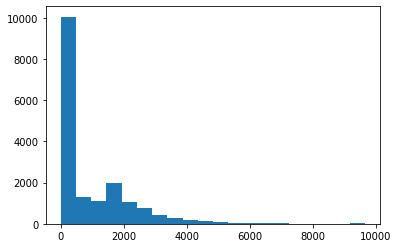

In [6]:
plt.hist(balansi_data_01['AMOUNT'], bins = 20)
plt.show()

In [7]:
country_ids_data = pd.read_csv("data/MINFIN_BREACH/AEOI/COUNTRY.csv")

In [8]:
currency_ids_data = pd.read_csv("data/MINFIN_BREACH/AEOI/CURRENCY.csv")

In [8]:
pension_recipients = pd.read_csv("data/MINFIN_BREACH/AEOI/PEN_RECIPIENT.csv")

In [9]:
pension_recipients.shape

(17603, 12)

In [10]:
pension_recipients.head(10)

,DOCREFID,MESSAGE_ID,CORRDOCREFID,PEN_RECIPIENT_ID,NATURAL_PERSON_ID,REPRESENTATIVE_ID,CREATED_BY,CREATED_ON,MODIFIED_BY,MODIFIED_ON,RECIPIENT_NUMBER,INFORMATION_STATUS
0,PEN_NSSI2014-12-31536,203,NaN,203,203,NaN,NSSI_PEN,2015-05-18 16:42:19.000000,NaN,NaN,3201034369,new
1,PEN_NSSI2014-12-31537,204,NaN,204,204,NaN,NSSI_PEN,2015-05-18 16:42:19.000000,NaN,NaN,4807314376,new
2,PEN_NSSI2014-12-31538,205,NaN,205,205,NaN,NSSI_PEN,2015-05-18 16:42:19.000000,NaN,NaN,4807314376,new
3,PEN_NSSI2014-12-31539,206,NaN,206,206,NaN,NSSI_PEN,2015-05-18 16:42:19.000000,NaN,NaN,4807314376,new
4,PEN_NSSI2014-12-31540,207,NaN,207,207,NaN,NSSI_PEN,2015-05-18 16:42:19.000000,NaN,NaN,3606184474,new
5,PEN_NSSI2014-12-31541,208,NaN,208,208,NaN,NSSI_PEN,2015-05-18 16:42:19.000000,NaN,NaN,3606184474,new
6,PEN_NSSI2014-12-31542,209,NaN,209,209,NaN,NSSI_PEN,2015-05-18 16:42:19.000000,NaN,NaN,3606184474,new
7,PEN_NSSI2014-12-31543,210,NaN,210,210,NaN,NSSI_PEN,2015-05-18 16:42:19.000000,NaN,NaN,4403134474,new
8,PEN_NSSI2014-12-31544,211,NaN,211,211,NaN,NSSI_PEN,2015-05-18 16:42:19.000000,NaN,NaN,4403134474,new
9,PEN_NSSI2014-12-31545,212,NaN,212,212,NaN,NSSI_PEN,2015-05-18 16:42:19.000000,NaN,NaN,4403134474,new


In [14]:
pension_recipients.dtypes

DOCREFID               object
MESSAGE_ID              int64
CORRDOCREFID          float64
PEN_RECIPIENT_ID        int64
NATURAL_PERSON_ID       int64
REPRESENTATIVE_ID     float64
CREATED_BY             object
CREATED_ON             object
MODIFIED_BY           float64
MODIFIED_ON           float64
RECIPIENT_NUMBER        int64
INFORMATION_STATUS     object
dtype: object

In [15]:
pensii.RECIPIENT_NUMBER.min()

171171

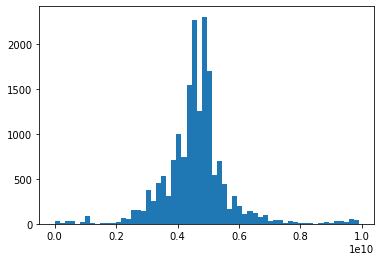

In [16]:
plt.hist(pensii['RECIPIENT_NUMBER'], bins = 60)
plt.show()

In [17]:
sanction = pd.read_csv("data/MINFIN_BREACH/AUAN/PENALTY_NORMS.csv")

C:\Users\kalojanz\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
sanction.shape

(328448, 14)

In [19]:
sanction.head()

,ANPID,TYPESANCID,TYPESTOCKID,IDPENALTY_NORM,PENNORM,CAPTYPE,SANCSIZE,STOCKEQUIV,IMPOS_MSRE,STOCKAMOUNT,DATE_CREATED,PNORM_ADDINFO,SANC_AFTERAPP,DATE_LAST_CHANGE
0,5,3.0,NaN,3,157.0,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70,1.0,NaN,24,158.0,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75,NaN,NaN,29,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,86,1.0,NaN,40,158.0,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,94,3.0,NaN,47,49.0,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
sanction.dtypes

ANPID                 int64
TYPESANCID          float64
TYPESTOCKID          object
IDPENALTY_NORM        int64
PENNORM             float64
CAPTYPE             float64
SANCSIZE            float64
STOCKEQUIV          float64
IMPOS_MSRE          float64
STOCKAMOUNT         float64
DATE_CREATED         object
PNORM_ADDINFO        object
SANC_AFTERAPP       float64
DATE_LAST_CHANGE     object
dtype: object

In [21]:
sanction.SANCSIZE.max()

11730000.0

In [22]:
data.COUNTRY_ID.unique()

NameError: name 'data' is not defined

In [23]:
sanction[data.SANCSIZE == 11730000.0]

NameError: name 'data' is not defined

In [42]:
data.RECIPIENT_NUMBER.max()

AttributeError: 'DataFrame' object has no attribute 'RECIPIENT_NUMBER'

In [249]:
data = pd.read_csv("data/MINFIN_BREACH/AUAN/AUANREPRESS.csv")

C:\Users\kalojanz\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [250]:
data.shape

(561846, 6)

In [252]:
data.isna().sum() / len(data) * 100

AUANID           0.000000
IDREPRES         0.000000
REPRESEGN       27.677513
REPRESNAME      27.527472
REPRCODETYPE     0.000000
REPR_CHECKED     1.769702
dtype: float64

In [212]:
data.head()

,AUANID,IDREPRES,REPRESEGN,REPRESNAME,REPRCODETYPE,REPR_CHECKED
0,182,103,6211045366,КИРИЛ ПАНАЙОТОВ ПАНАЙОТОВ с ЕГН 6211045366,1,NaN
1,183,104,7803313588,ХРИСТО НИКОЛОВ КИТАНОВ,1,NaN
2,191,105,6111204660,ДИМИТЪР НИКОЛАЕВ ВЕЛИКОВ ЕГН 6111204660,1,1.0
3,156,106,7108174474,Ангелина Йорданова Земярска,1,NaN
4,158,107,3907043492,ТАМАРА ЛИЛОВА,1,NaN


In [213]:
data.dtypes

AUANID            int64
IDREPRES          int64
REPRESEGN        object
REPRESNAME       object
REPRCODETYPE      int64
REPR_CHECKED    float64
dtype: object

In [247]:
data = data[pd.notnull(data['REPRESEGN'])]

In [248]:
data.shape

(394856, 6)

In [216]:
data['REPRESEGN'] = pd.to_numeric(data['REPRESEGN'], errors="coerce")
data.dropna(how="any", inplace=True)

In [217]:
data['REPRESEGN'] = data['REPRESEGN'].astype('int64')

In [218]:
data = data[data['REPRESEGN'] >= 1000000000]

In [219]:
data = data[data['REPRESEGN'] < 9999999999]

In [221]:
data['REPRESEGN'].min()

1000025875

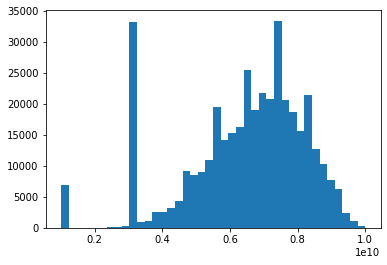

In [222]:
plt.hist(data['REPRESEGN'], bins = 40)
plt.show()

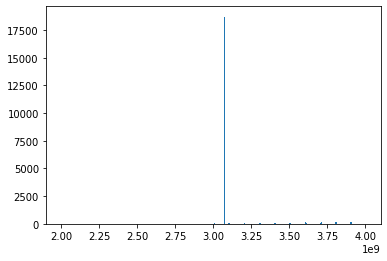

In [223]:
plt.hist(data['REPRESEGN'], bins = 1000, range = (0.2e10, 0.4e10))
plt.show()

In [224]:
scammers_egn = data['REPRESEGN'].groupby(data['REPRESEGN']).count()

In [238]:
cleaned_data = data.loc[(data['REPRESEGN']/10000 < 301231) | (data['REPRESEGN']/10000 > 310101)]

In [239]:
cleaned_data.shape

(362284, 6)

In [241]:
cleaned_data.dtypes

AUANID            int64
IDREPRES          int64
REPRESEGN         int64
REPRESNAME       object
REPRCODETYPE      int64
REPR_CHECKED    float64
dtype: object

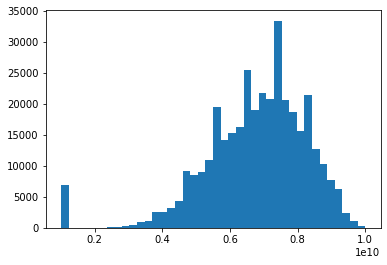

In [244]:
plt.hist(cleaned_data['REPRESEGN'], bins = 40)
# plt.yscale('log')
plt.show()

In [245]:
cleaned_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AUANID,362284.0,2.696425e+05,1.456687e+05,2.000000e+00,1.476158e+05,2.699850e+05,3.936142e+05,5.319650e+05
IDREPRES,362284.0,2.873565e+05,1.574899e+05,1.500000e+01,1.551695e+05,2.879605e+05,4.214822e+05,5.694170e+05
REPRESEGN,362284.0,6.772791e+09,1.511437e+09,1.000026e+09,5.907176e+09,7.001271e+09,7.807121e+09,9.999710e+09
REPRCODETYPE,362284.0,1.038439e+00,2.724844e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
REPR_CHECKED,362284.0,5.273708e-01,4.992510e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [246]:
cleaned_data.isna().any()

AUANID          False
IDREPRES        False
REPRESEGN       False
REPRESNAME      False
REPRCODETYPE    False
REPR_CHECKED    False
dtype: bool

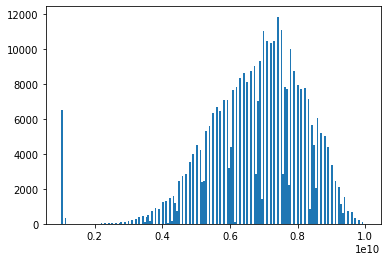

In [253]:
plt.hist(cleaned_data['REPRESEGN'], bins = 'fd')
plt.show()

In [254]:
len(cleaned_data['REPRESEGN'].unique())

160715

https://bg.wikipedia.org/wiki/%D0%95%D0%B4%D0%B8%D0%BD%D0%B5%D0%BD_%D0%B3%D1%80%D0%B0%D0%B6%D0%B4%D0%B0%D0%BD%D1%81%D0%BA%D0%B8_%D0%BD%D0%BE%D0%BC%D0%B5%D1%80 